# Efficiency calculations for Dec 2 2022
Took more data with the camera, but didn't do parameter scans so that have more data at one set of parameters only. Hoping this will lower uncertainties in efficiency calculations. The rotational cooling microwaves were also not on while this data was being taken, but the rotational cooling laser was.

## Import packages

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd
import uncertainties as uc

## Set plot parameters

In [80]:
plt.style.use(['seaborn-deep'])
# plt.style.use(['fivethirtyeight'])


# Font for labels
plt.rcParams['font.family'] = 'serif'

# Linewidths for plots
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['lines.marker'] = 'x'

# Axes
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True


# Ticks
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Legend
plt.rcParams['legend.fontsize'] = 16

## Save folder

In [81]:
SAVE_DIR = "./saved_figs/Dec 2 2022/"

## SPA 1
Start by getting data from file

In [82]:
fname = ('G:\My Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data\SPA_test_12_2_2021_analyzed.hdf')

run_name_R0F2 = "1638479291 R(0), F = 2 with SPA J = 0 to 1 microwaves switching"
df_R0F2 = pd.read_hdf(fname, run_name_R0F2)

run_name_R1F3 = "1638481381 R(1), F = 3 with SPA J = 0 to 1 microwaves switching"
df_R1F3 = pd.read_hdf(fname, run_name_R1F3)

run_name_R1F3_SPA2 = "1638483736 R(1), F = 3 with SPA J = 1 to 2 microwaves switching"
df_R1F3_SPA2 = pd.read_hdf(fname, run_name_R1F3_SPA2)

run_name_R2F4 = "1638485119 R(2), F = 4 with SPA J = 1 to 2 microwaves switching"
df_R2F4 = pd.read_hdf(fname, run_name_R2F4)

### Plot depletion on R(0), F = 2

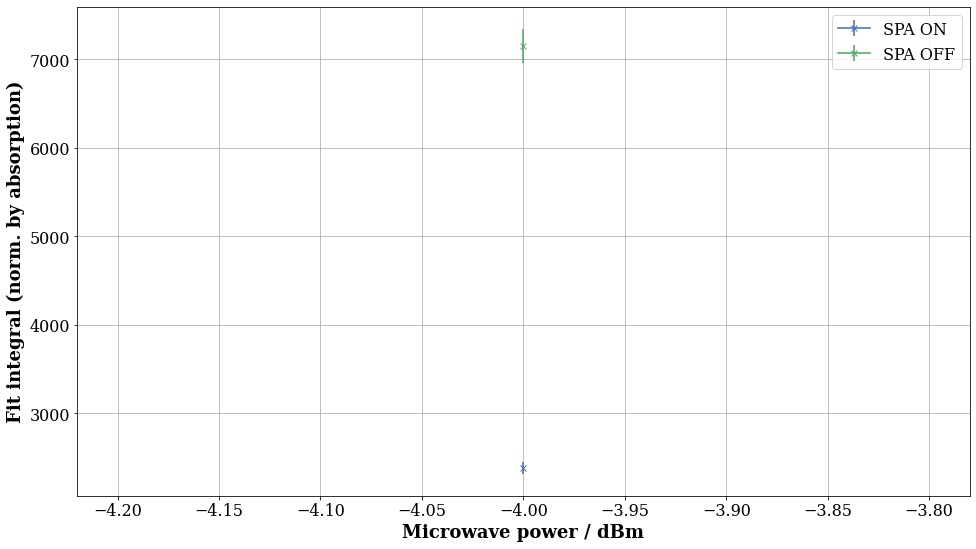

In [83]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_R0F2.SPAJ01Power, df_R0F2.IntegratedFluorescence_ON,
            yerr = df_R0F2.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(df_R0F2.SPAJ01Power, df_R0F2.IntegratedFluorescence_OFF, 
            yerr = df_R0F2.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("Microwave power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J01_depl.pdf")

Text(0, 0.5, 'Remaining population in J = 0, F = 1')

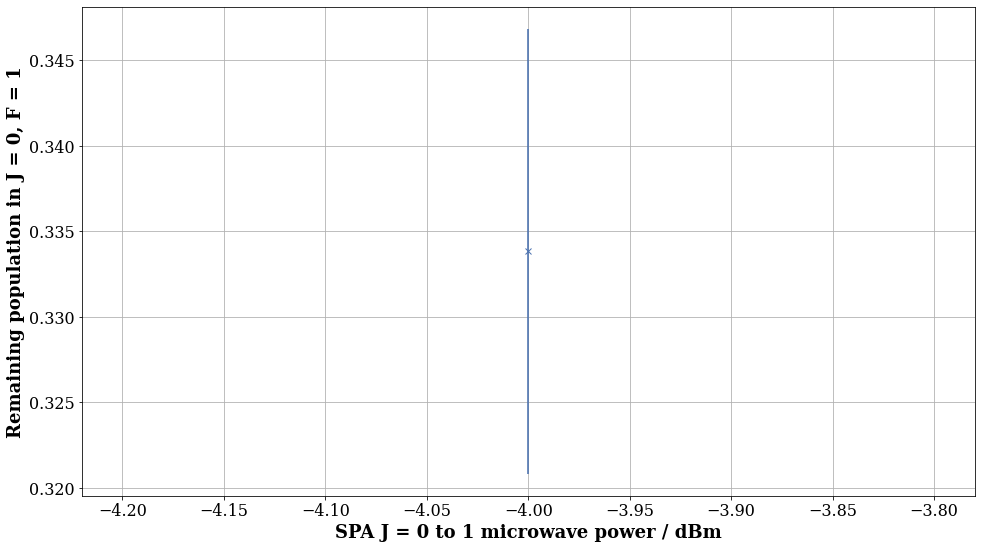

In [84]:
fig, ax = plt.subplots(figsize = (16,9))

df_R0F2["pop_J0F1"] = df_R0F2.IntegratedFluorescence_ON/df_R0F2.IntegratedFluorescence_OFF
df_R0F2["pop_J0F1_err"] = (np.sqrt(
                                (df_R0F2.IntegratedFluorescence_ON_err/df_R0F2.IntegratedFluorescence_ON)**2
                                + (df_R0F2.IntegratedFluorescence_OFF_err/df_R0F2.IntegratedFluorescence_OFF)**2)
                                * df_R0F2.pop_J0F1)

ax.errorbar(df_R0F2.SPAJ01Power, df_R0F2.pop_J0F1, df_R0F2.pop_J0F1_err, marker = 'x', ls = '')
ax.set_xlabel("SPA J = 0 to 1 microwave power / dBm")
ax.set_ylabel("Remaining population in J = 0, F = 1")

### Plot accumulation on R(1), F = 3

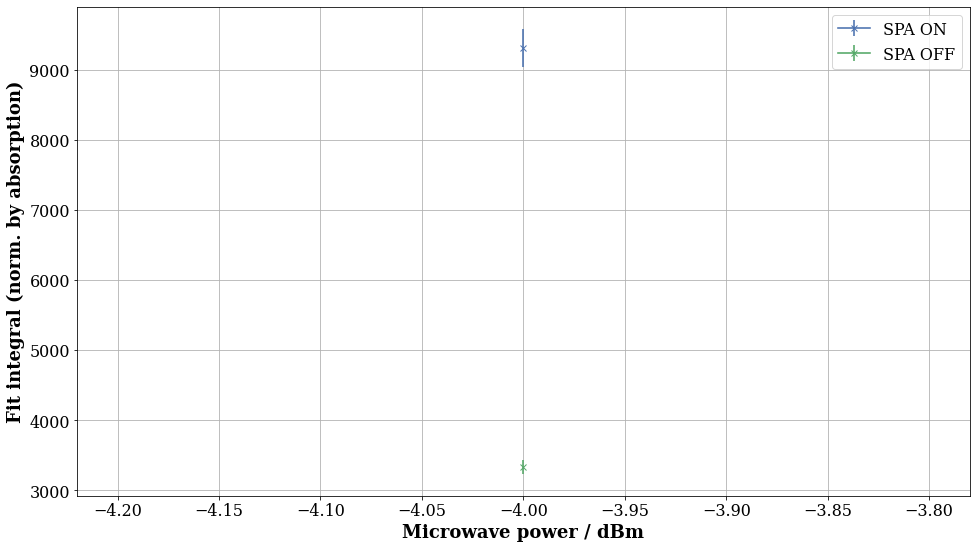

In [67]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_R1F3.SPAJ01Power, df_R1F3.IntegratedFluorescence_ON,
            yerr = df_R1F3.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(df_R1F3.SPAJ01Power, df_R1F3.IntegratedFluorescence_OFF, 
            yerr = df_R1F3.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("Microwave power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J01_accum.pdf")

### SPA1 efficiency

In [68]:
# Import uncertainties package for easily dealing with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp

In [69]:
# Define signal sizes
S_0_ON = unp.uarray(df_R0F2.IntegratedFluorescence_ON,df_R0F2.IntegratedFluorescence_ON_err)
S_0_OFF = unp.uarray(df_R0F2.IntegratedFluorescence_OFF,df_R0F2.IntegratedFluorescence_OFF_err)
S_1_ON = unp.uarray(df_R1F3.IntegratedFluorescence_ON,df_R1F3.IntegratedFluorescence_ON_err)
S_1_OFF = unp.uarray(df_R1F3.IntegratedFluorescence_OFF,df_R1F3.IntegratedFluorescence_OFF_err)

# Numbers of photons per molecule for each transition
n_gamma_0 = 1.92
n_gamma_1 = 2.10

# Calculate efficiency based on depletion
e01_dep = (1 - S_0_ON/S_0_OFF)/(1 - 3*n_gamma_0*S_1_OFF/(5*n_gamma_1*S_0_OFF))

# Calculate efficiency based on accumulation
e01_acc = 5/3 * (S_1_ON/S_1_OFF-1)/(5*n_gamma_1*S_0_OFF/(3*n_gamma_0*S_1_OFF) - 1)

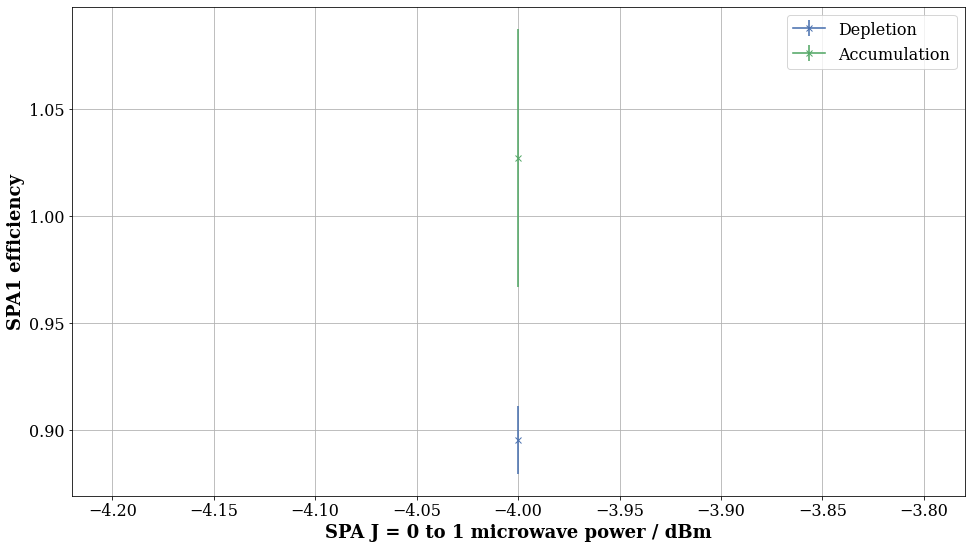

In [70]:
fig, ax = plt.subplots(figsize = (16,9))
ax.set_xlabel("SPA J = 0 to 1 microwave power / dBm")
ax.set_ylabel("SPA1 efficiency")
ax.errorbar(df_R0F2.SPAJ01Power, unp.nominal_values(e01_dep), 
            yerr = unp.std_devs(e01_dep), label = 'Depletion', marker = 'x')

ax.errorbar(df_R0F2.SPAJ01Power, unp.nominal_values(e01_acc), 
            yerr = unp.std_devs(e01_acc), label = 'Accumulation', marker = 'x')

ax.legend()
fig.savefig(SAVE_DIR+"J01_eff_vs.pdf")

## SPA2
### Plot depletion on R(1), F = 3

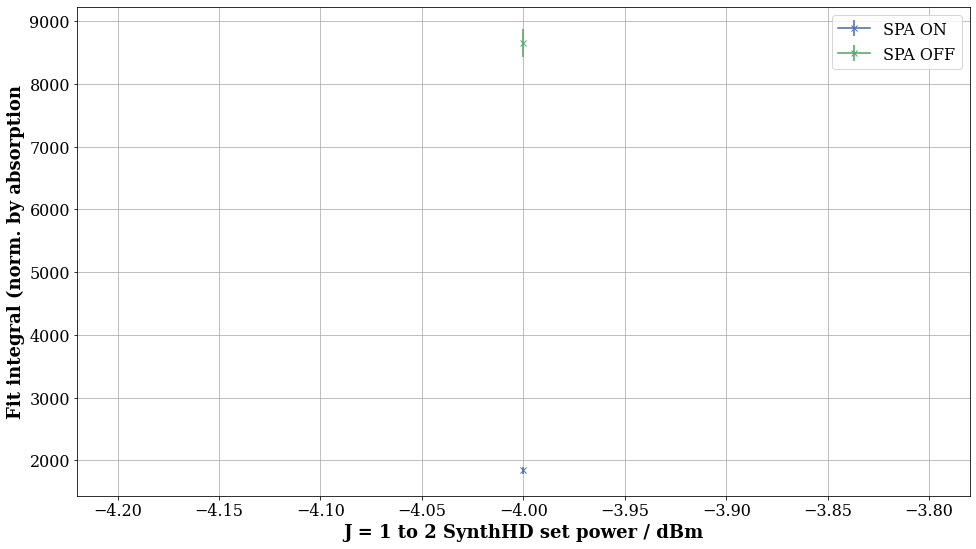

In [71]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_R1F3_SPA2.SPAJ12Power, df_R1F3_SPA2.IntegratedFluorescence_ON,
            yerr = df_R1F3_SPA2.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(df_R1F3_SPA2.SPAJ12Power, df_R1F3_SPA2.IntegratedFluorescence_OFF, 
            yerr = df_R1F3_SPA2.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("J = 1 to 2 SynthHD set power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J12_depl.pdf")

### Plot accumulation on R(2), F = 4

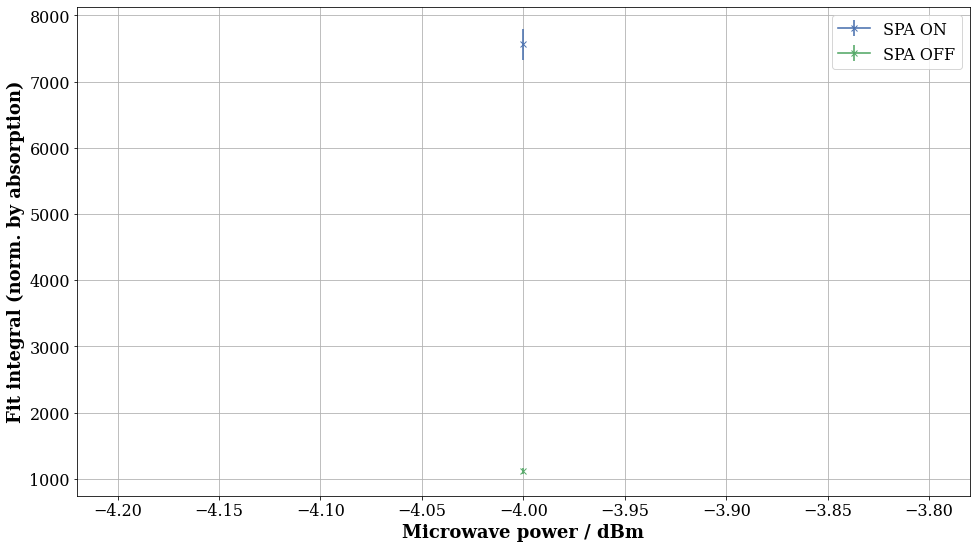

In [72]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_R2F4.SPAJ12Power, df_R2F4.IntegratedFluorescence_ON,
            yerr = df_R2F4.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(df_R2F4.SPAJ12Power, df_R2F4.IntegratedFluorescence_OFF, 
            yerr = df_R2F4.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("Microwave power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J12_accum.pdf")

### SPA2 efficiency

In [73]:
# Import uncertainties package for easily dealing with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp

In [74]:
# Define signal sizes

# SPA1

S_0_ON = ufloat(df_R0F2.IntegratedFluorescence_ON[0],
                    df_R0F2.IntegratedFluorescence_ON_err[0])
S_0_OFF = ufloat(df_R0F2.IntegratedFluorescence_OFF[0],
                     df_R0F2.IntegratedFluorescence_OFF_err[0])
S_1_ON = ufloat(df_R1F3.IntegratedFluorescence_ON[0],
                    df_R1F3.IntegratedFluorescence_ON_err[0])
S_1_OFF = ufloat(df_R1F3.IntegratedFluorescence_OFF[0],
                    df_R1F3.IntegratedFluorescence_OFF_err[0])

# SPA2
Σ_1_ON = ufloat(df_R1F3_SPA2.IntegratedFluorescence_ON[0], df_R1F3_SPA2.IntegratedFluorescence_ON_err[0])
Σ_1_OFF = ufloat(df_R1F3_SPA2.IntegratedFluorescence_OFF[0],df_R1F3_SPA2.IntegratedFluorescence_OFF_err[0])
Σ_2_ON = ufloat(df_R2F4.IntegratedFluorescence_ON[0],df_R2F4.IntegratedFluorescence_ON_err[0])
Σ_2_OFF = ufloat(df_R2F4.IntegratedFluorescence_OFF[0],df_R2F4.IntegratedFluorescence_OFF_err[0])

# Numbers of photons per molecule for each transition
n_gamma_0 = 1.92
n_gamma_1 = 2.10
n_gamma_2 = 2.13

# Calculate efficiency based on depletion for SPA1
e01_dep = (1 - S_0_ON/S_0_OFF)/(1 - 3*n_gamma_0*S_1_OFF/(5*n_gamma_1*S_0_OFF))

# Calculate efficiency based on accumulation for SPA1
e01_acc = 5/3 * (S_1_ON/S_1_OFF-1)/(5*n_gamma_1*S_0_OFF/(3*n_gamma_0*S_1_OFF) - 1)

# Calculate efficiency based on depletion for SPA2
e01 = e01_dep
e12_pow_dep = (
    7*n_gamma_2
       *(5*e01*n_gamma_1*S_0_OFF + 5*n_gamma_0*S_1_OFF - 3*e01*n_gamma_0*S_1_OFF - 5*n_gamma_0*Σ_1_ON)
    /(7*n_gamma_2*(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF)
       - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

e12_pow_acc = (
    35*n_gamma_0*n_gamma_1*(Σ_2_ON - Σ_2_OFF)
    /(7*n_gamma_2
      *(5*e01*n_gamma_1*S_0_OFF + 3*(1-e01)*n_gamma_0*S_1_OFF) - 15*n_gamma_0*n_gamma_1*Σ_2_OFF)
)

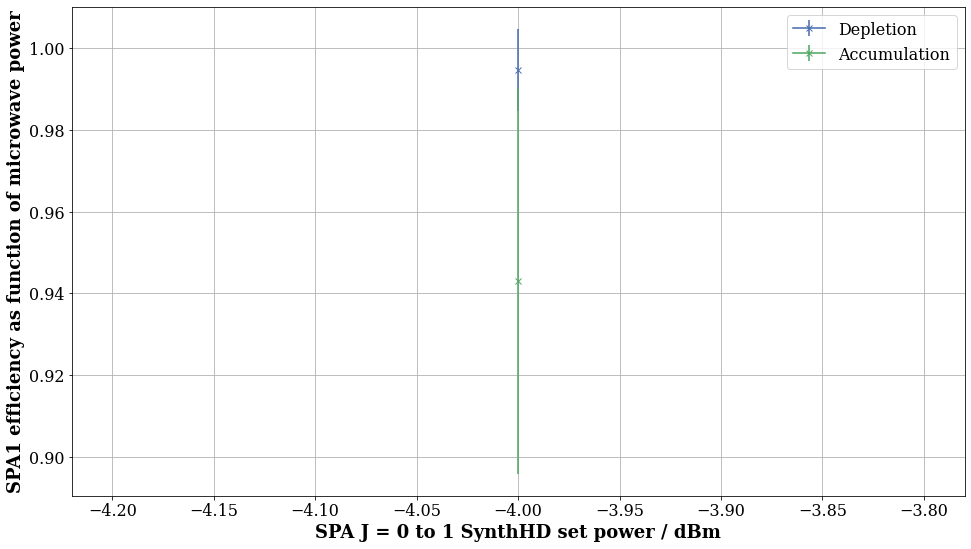

In [75]:
fig, ax = plt.subplots(figsize = (16,9))
ax.set_xlabel("SPA J = 0 to 1 SynthHD set power / dBm")
ax.set_ylabel("SPA1 efficiency as function of microwave power")
ax.errorbar(df_R1F3_SPA2.SPAJ12Power, unp.nominal_values(e12_pow_dep), 
            yerr = unp.std_devs(e12_pow_dep), label = 'Depletion', marker = 'x')

ax.errorbar(df_R1F3_SPA2.SPAJ12Power, unp.nominal_values(e12_pow_acc), 
            yerr = unp.std_devs(e12_pow_acc), label = 'Accumulation', marker = 'x')

ax.legend()
fig.savefig(SAVE_DIR+"J12_eff_vs_pow.pdf")

## Bar plot

Text(0.5, 0, 'State preparation efficiency')

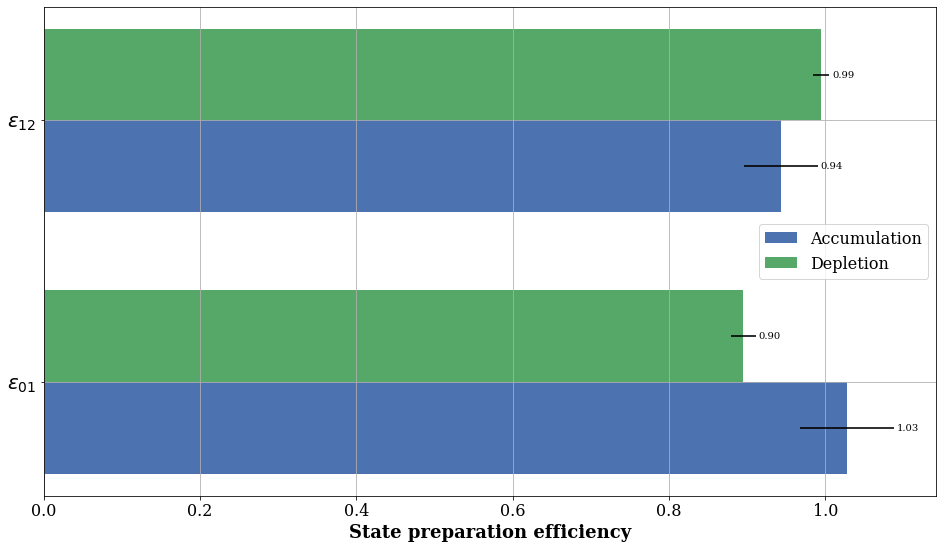

In [127]:
fig, ax = plt.subplots(figsize = (16,9))
x_acc = [e01_acc.nominal_value,  e12_pow_acc.nominal_value]
x_acc_err = [e01_acc.std_dev, e12_pow_acc.std_dev]
x_dep = [e01_dep.nominal_value, e12_pow_dep.nominal_value]
x_dep_err = [ e01_dep.std_dev, e12_pow_dep.std_dev]
labels = [r"$\epsilon_{01}$",r"$\epsilon_{12}$"]

y = np.arange(len(labels))
height = 0.35
ax.set_yticks(y, labels, fontsize = 20)


rects_acc = ax.barh(y-height/2, x_acc, height, xerr = x_acc_err, label = 'Accumulation')
rects_dep = ax.barh(y+height/2, x_dep, height, xerr = x_dep_err, label = 'Depletion')

ax.bar_label(rects_acc, padding=3, fmt = "%.2f")
ax.bar_label(rects_dep, padding=3, fmt = "%.2f")

ax.legend()

ax.set_xlabel("State preparation efficiency")


## Looking at bootstrap
Get data from file

In [143]:
fname = ('G:\My Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data\SPA_test_12_2_2021_bootstrap.hdf')

df_R0F2_bs = pd.read_hdf(fname, run_name_R0F2)
df_R1F3_bs = pd.read_hdf(fname, run_name_R1F3)
df_R1F3_SPA2_bs = pd.read_hdf(fname, run_name_R1F3_SPA2)
df_R2F4_bs = pd.read_hdf(fname, run_name_R2F4)

Define some functions for testing for normality

In [164]:
from scipy.stats import norm, shapiro
import statsmodels.api as sm

# Function for rescaling data
def normalize(series):
    """
    Applies normal scaling to data in series
    """
    mu = series.mean()
    sigma = series.std()
    z = (series-mu)/sigma
    return z, mu, sigma

# Define a function to plot histogram of bootstrap values
def plot_hist(series, ax  = None):
    if ax is None:
        fig, ax = plt.subplots()
    
    # Rescale the data
    z, mu, sigma = normalize(series)
    
    # Plot histogram
    z.hist(bins = 20, density = True, figsize = (16,9), ax = ax)
    
    # Plot normal distribution for reference
    x = np.linspace(-3,3,1000)
    y = norm.pdf(x)
    ax.plot(x,y, ls = '--',marker = '', linewidth = 4)
    
# Function for plotting a QQ plot 
def plot_QQ(series, ax = None):
    if not ax:
        fig, ax = plt.subplots(figsize = (16,9))
    # Rescale the data
    z, mu, sigma = normalize(series)
    sm.qqplot(z, line = '45', ax = ax)
    
    
# Define a function that gives probability that the bootsrapped values actually follow a gaussian distribution
def do_shapiro_test(series):
    """
    Performs the Shapiro Wilk test to check if data follows normal distribution
    """
    # Rescale the data
    z, mu, sigma = normalize(series)
    
    # Perform the test
    result = shapiro(z)
    
    # Print the p-values
    print(f"Shapiro-Wilk test p-value: {result.pvalue*100:.2f}%")

Make histograms for each transition:

Text(0.5, 1.0, 'SPA1 OFF')

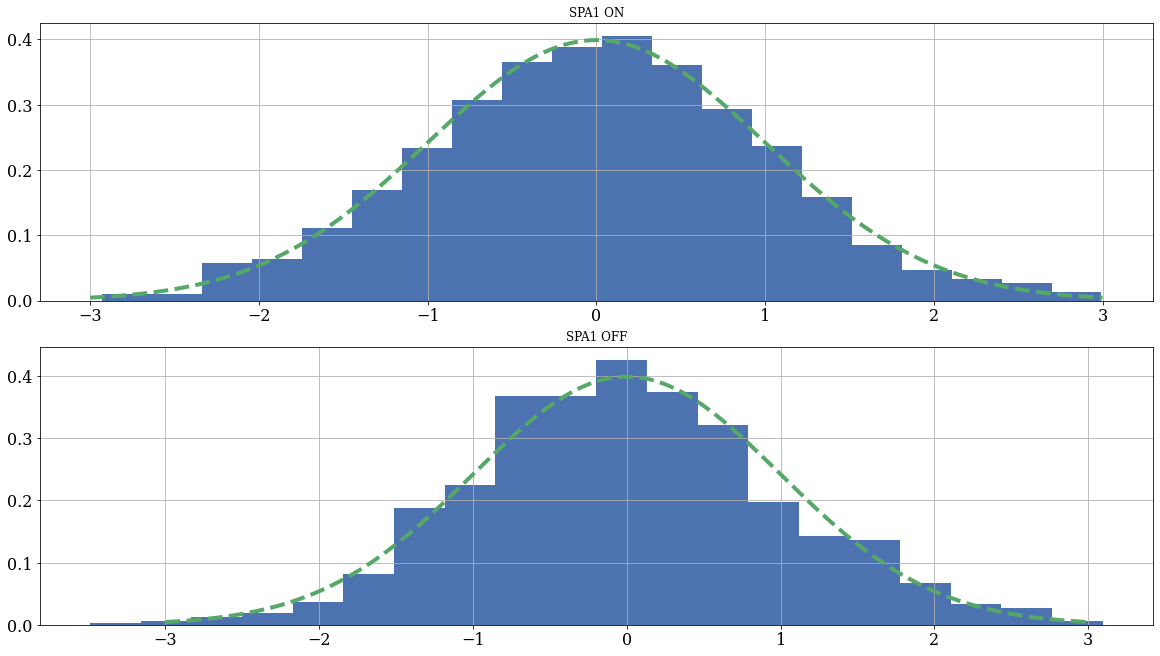

In [165]:
fig, ax = plt.subplots(2,1, figsize = (16,18), constrained_layout = True)
plot_hist(df_R0F2_bs.IntegratedFluorescence_ON, ax = ax[0]);
plot_hist(df_R0F2_bs.IntegratedFluorescence_OFF, ax = ax[1]);

ax[0].set_title("SPA1 ON")
ax[1].set_title("SPA1 OFF")

Text(0.5, 1.0, 'SPA1 OFF')

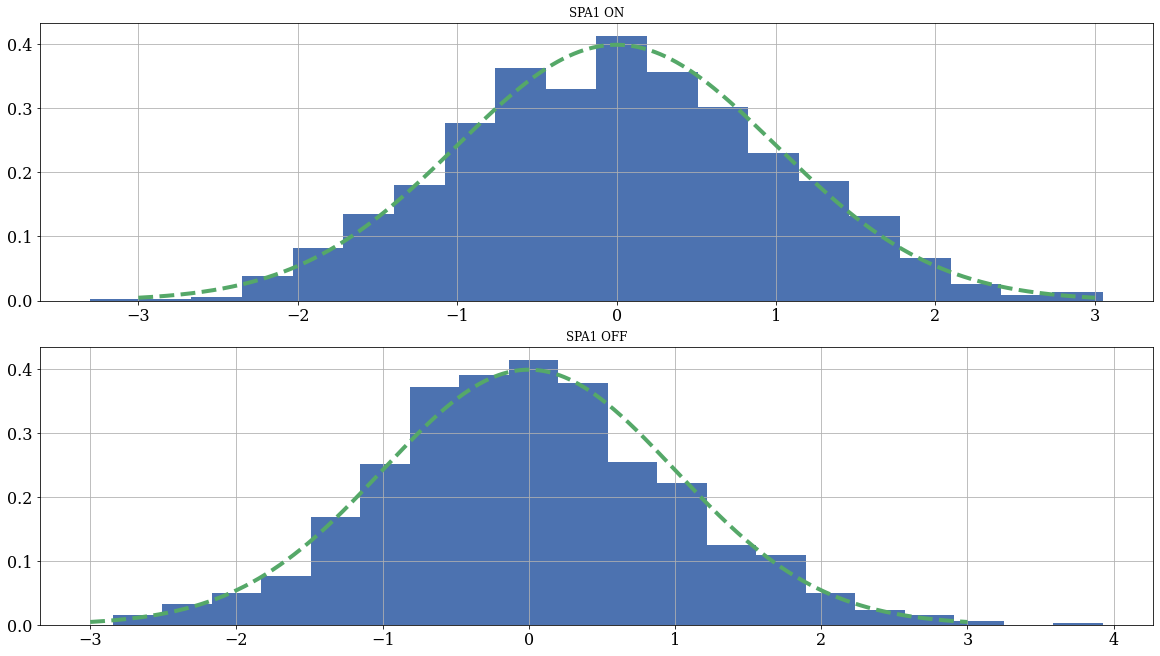

In [166]:
fig, ax = plt.subplots(2,1, figsize = (16,18), constrained_layout = True)
plot_hist(df_R1F3_bs.IntegratedFluorescence_ON, ax = ax[0]);
plot_hist(df_R1F3_bs.IntegratedFluorescence_OFF, ax = ax[1]);

ax[0].set_title("SPA1 ON")
ax[1].set_title("SPA1 OFF")

Text(0.5, 1.0, 'SPA1 OFF')

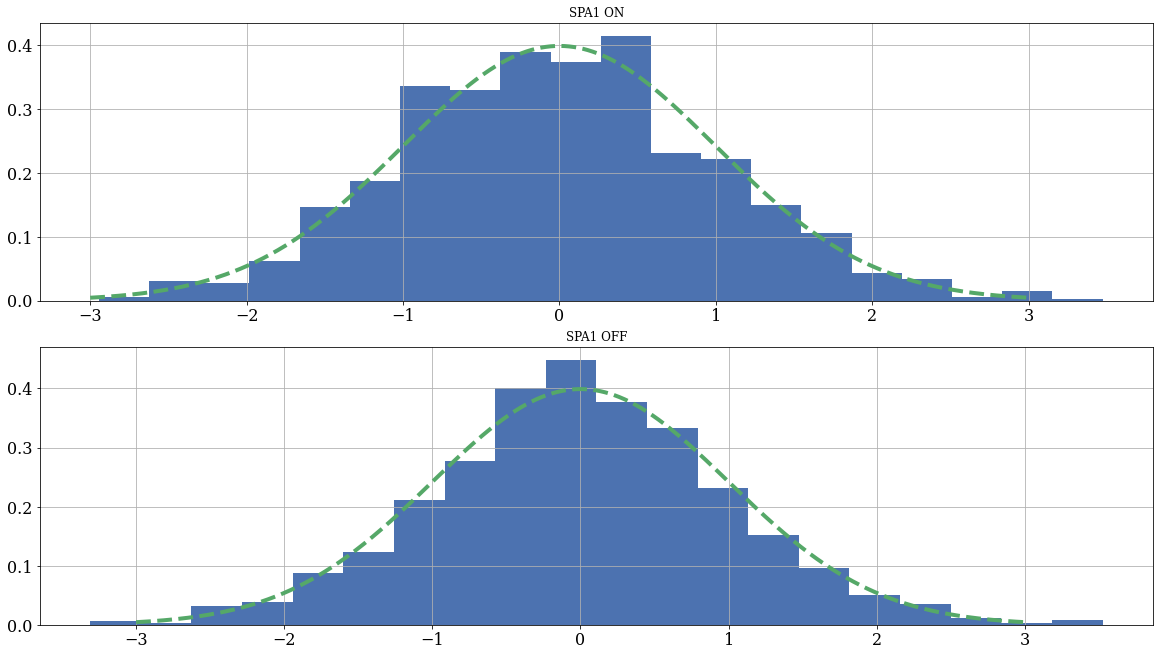

In [167]:
fig, ax = plt.subplots(2,1, figsize = (16,18), constrained_layout = True)
plot_hist(df_R1F3_SPA2_bs.IntegratedFluorescence_ON, ax = ax[0]);
plot_hist(df_R1F3_SPA2_bs.IntegratedFluorescence_OFF, ax = ax[1]);

ax[0].set_title("SPA1 ON")
ax[1].set_title("SPA1 OFF")

Text(0.5, 1.0, 'SPA1 OFF')

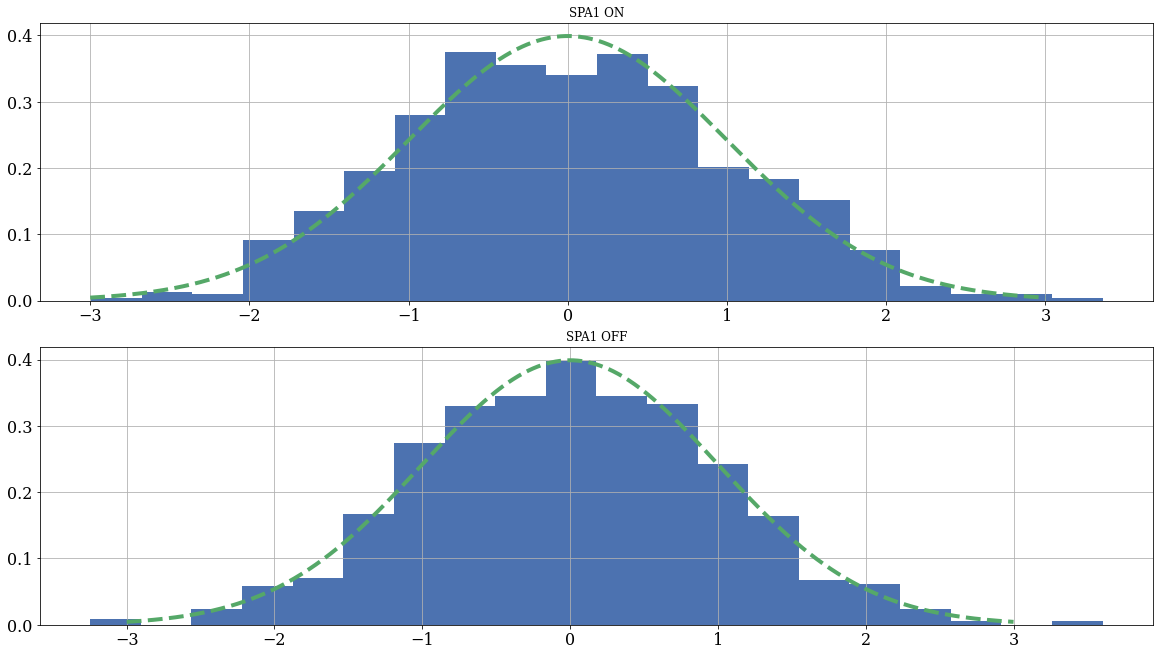

In [168]:
fig, ax = plt.subplots(2,1, figsize = (16,18), constrained_layout = True)
plot_hist(, ax = ax[0]);
plot_hist(df_R2F4_bs.IntegratedFluorescence_OFF, ax = ax[1]);

ax[0].set_title("SPA1 ON")
ax[1].set_title("SPA1 OFF")

Shapiro-Wilk test p-value: 37.80%


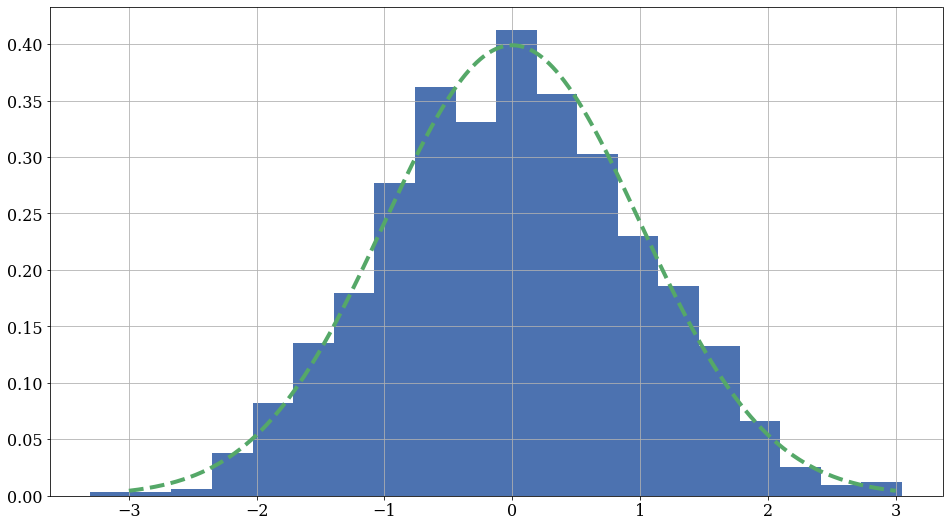

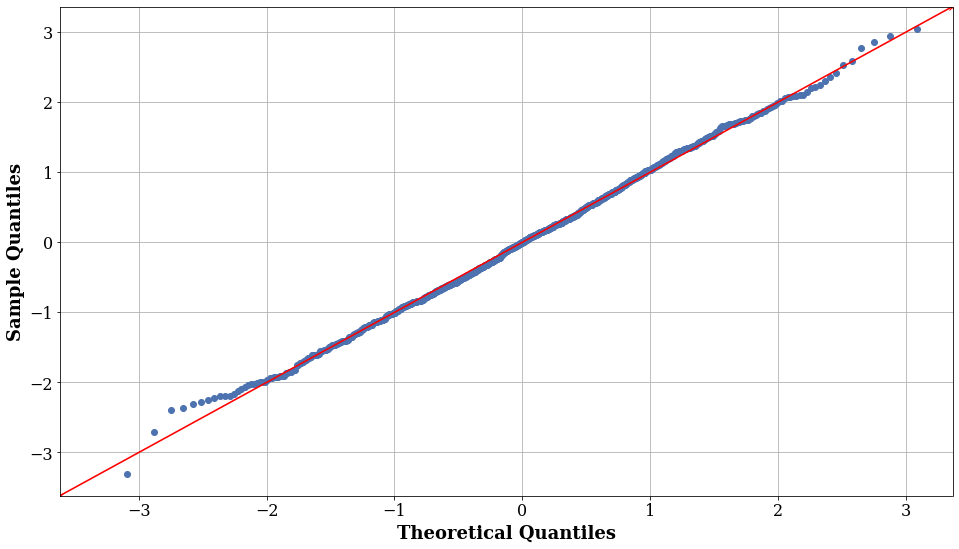

In [170]:
series = df_R1F3_bs.IntegratedFluorescence_ON

plot_hist(series)
do_shapiro_test(series)
plot_QQ(series)